In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [3]:
train.columns.tolist()

['ID',
 'Age',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Working_Week (Yearly)',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Gains',
 'Losses',
 'Dividends',
 'Income_Status',
 'Income']

In [4]:
test.columns.tolist()

['ID',
 'Age',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Working_Week (Yearly)',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Gains',
 'Losses',
 'Dividends',
 'Income_Status']

In [5]:
train['Education_Status'].unique()

array(['Middle (7-8)', 'Associates degree (Vocational)', 'High graduate',
       'Masters degree', 'Bachelors degree', 'High Freshman',
       'Elementary (1-4)', 'College', 'Children', 'High Sophomore',
       'Associates degree (Academic)', 'High Junior', 'Elementary (5-6)',
       'Doctorate degree', 'Professional degree', 'High Senior',
       'Kindergarten'], dtype=object)

In [6]:
train['Working_Week (Yearly)'].unique()

array([ 4, 52, 50,  0,  5, 30, 40, 20, 14,  6, 12, 48, 26, 44, 42, 46, 36,
       49, 45, 28, 35,  2,  8, 24, 15, 25, 16, 38, 22, 23, 43, 32, 17, 51,
       37, 13, 11, 47, 21,  1, 29, 10, 18, 39,  7, 34, 41,  9, 27,  3, 19,
       33, 31])

In [7]:
train['Employment_Status'].unique()
# Full-Time, Children or Armed Forces, Not working, Seeking Full-Time, 
# Choice Part-Time, Part-Time (Usually Part-Time), Part-Time (Usually Full-Time),
# Seeking Part-Time

array(['Full-Time', 'Children or Armed Forces', 'Not Working',
       'Seeking Full-Time', 'Choice Part-Time',
       'Part-Time (Usually Part-Time)', 'Part-Time (Usually Full-Time)',
       'Seeking Part-Time'], dtype=object)

In [8]:
train['Industry_Status'].unique()

array(['Social Services', 'Entertainment', 'Manufacturing (Non-durable)',
       'Retail', 'Not in universe or children', 'Construction',
       'Hospitals', 'Manufacturing (Durable)', 'Public Administration',
       'Education', 'Finance Insurance & Real Estate', 'Transportation',
       'Medical (except Hospitals)', 'Wholesale',
       'Other professional services',
       'Personal Services (except Private Household)',
       'Business & Repair', 'Private Household Services', 'Mining',
       'Agriculture', 'Utilities & Sanitary', 'Communications',
       'Forestry & Fisheries', 'Armed Forces'], dtype=object)

In [14]:
train['Gender'].unique()

array(['M', 'F'], dtype=object)

#### Income(target) 분포 보기

(array([1.585e+04, 3.549e+03, 4.840e+02, 4.800e+01, 1.700e+01, 1.300e+01,
        1.500e+01, 7.000e+00, 9.000e+00, 8.000e+00]),
 array([   0. ,  999.9, 1999.8, 2999.7, 3999.6, 4999.5, 5999.4, 6999.3,
        7999.2, 8999.1, 9999. ]),
 <BarContainer object of 10 artists>)

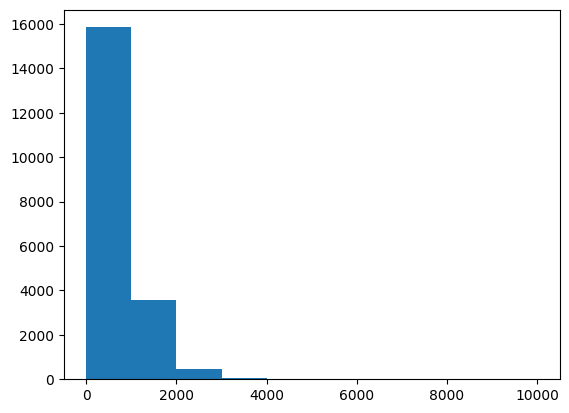

In [9]:
target = train['Income']
plt.hist(target)

In [10]:
target.value_counts()

Income
0       8697
500      743
700      550
600      547
800      526
        ... 
543        1
1713       1
1602       1
1722       1
2373       1
Name: count, Length: 1228, dtype: int64

In [11]:
# 성비로 income 구별하기
train.groupby('Gender')['Income'].mean()

Gender
F    491.735103
M    623.620382
Name: Income, dtype: float64

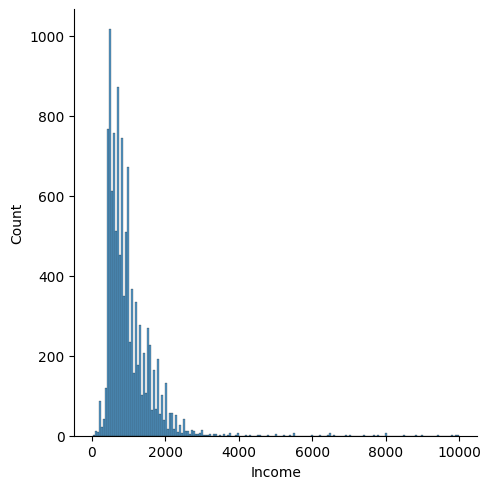

In [12]:
# 0보다 큰 경우만 봐보기
cond = train['Income'] > 0
sns.displot(train[cond]['Income'])

#### 성비에 따른 target 분포 시각화

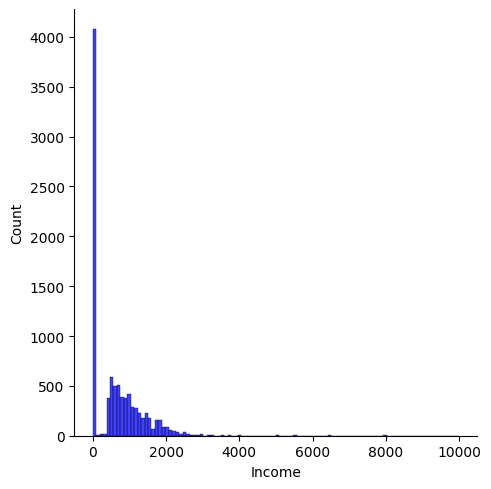

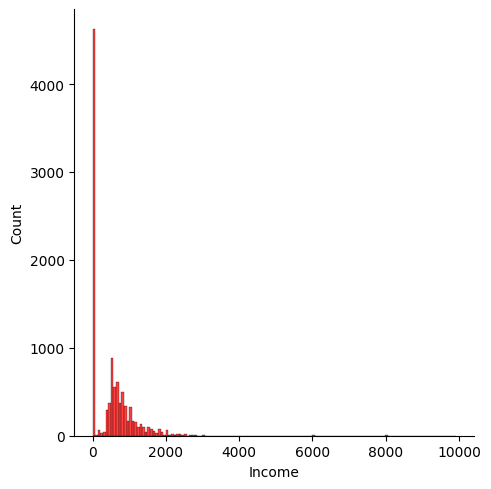

In [27]:
cond_m = train['Gender'] == 'M'
cond_w = train['Gender'] == 'F'

# fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.displot(train[cond_m]['Income'], label=0, color='blue')
# axes[0].set_title('Male Income')

sns.displot(train[cond_w]['Income'], label=1, color='red')
# axes[1].set_title('Female Income')

# plt.legend()
plt.show()

In [24]:
sns.violinplot(x='Income', y='')

Series([], Name: Income, dtype: int64)

### 이산형 변수, 연속형 변수 추출

In [38]:
columns = train.columns.tolist()

train_obj = [col for col in columns if train[col].dtypes == 'object']
train_int = [col for col in columns if train[col].dtypes == 'int64']

In [40]:
print(train_int)
print(train_obj)

['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']
['ID', 'Gender', 'Education_Status', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Hispanic_Origin', 'Martial_Status', 'Household_Status', 'Household_Summary', 'Citizenship', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']


#### object 형 feature에 대해서 Income 값을 histogram으로 시각화

In [59]:
obj_columns = train.dtypes[train.dtypes == 'object'].index.tolist()
obj_columns.remove('ID')
print(obj_columns)

['Gender', 'Education_Status', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Hispanic_Origin', 'Martial_Status', 'Household_Status', 'Household_Summary', 'Citizenship', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']


In [60]:
def show_hist_by_target(df, column):
    colors = sns.color_palette('husl', 10) 
    col_obj = df[column].unique()
    for i, col in enumerate(col_obj):
        sns.histplot(data=df[df[column]==col], x='Income', color=colors[i], label=col)
    
    plt.legend()
    plt.show()
    

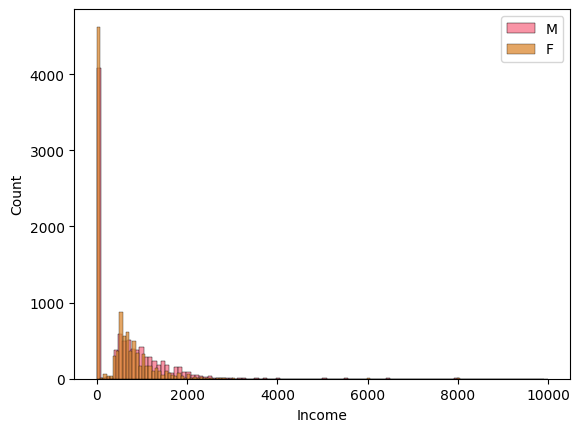

IndexError: list index out of range

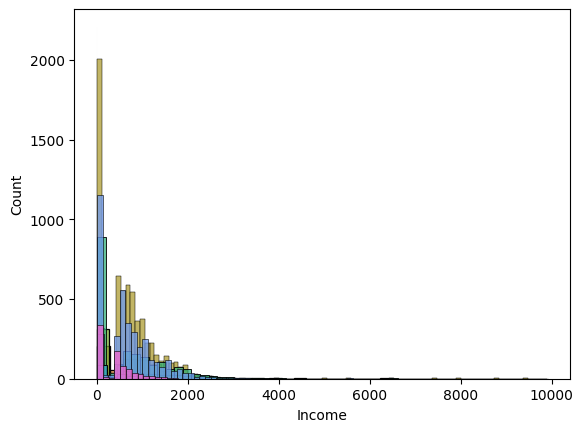

In [61]:
for column in obj_columns:
    show_hist_by_target(train, column)

In [65]:
for col in obj_columns:
    print(col, len(train[col].unique()))

Gender 2
Education_Status 17
Employment_Status 8
Industry_Status 24
Occupation_Status 15
Race 5
Hispanic_Origin 10
Martial_Status 7
Household_Status 31
Household_Summary 8
Citizenship 5
Birth_Country 43
Birth_Country (Father) 43
Birth_Country (Mother) 43
Tax_Status 6
Income_Status 3


In [66]:
print(train['Household_Status'].unique())

['Householder' 'Nonfamily householder'
 'Child 18+ never marr Not in a subfamily' 'Spouse of householder'
 'Other Relative 18+ ever married Responsible Person of subfamily'
 'Child <18 never marr not in subfamily'
 'Other Relative <18 never married child of subfamily Responsible Person'
 'Child 18+ ever married Responsible Person of subfamily'
 'Secondary individual' 'Grandchild 18+ never marr not in subfamily'
 'Other Rel 18+ ever marr not in subfamily'
 'Responsible Person of unrelated subfamily'
 'Grandchild <18 never married child of subfamily Responsible Person'
 'Child 18+ ever marr Not in a subfamily'
 'Other Rel 18+ never marr not in subfamily'
 'Child 18+ never married Responsible Person of subfamily'
 'Other Rel <18 never marr not in subfamily'
 'Child under 18 of Responsible Person of unrelated subfamily'
 'Grandchild <18 never marr not in subfamily' 'In group quarters'
 'Other Relative 18+ spouse of subfamily Responsible Person'
 'Other Relative 18+ never married Responsibl

In [69]:
train.groupby('Tax_Status')['Income'].mean()

Tax_Status
Head of Household (HOH)                                     676.317995
Married Filling Jointly both over 65 (MFJ)                  203.144989
Married Filling Jointly both under 65 (MFJ)                 742.472403
Married Filling Jointly one over 65 & one under 65 (MFJ)    474.095082
Nonfiler                                                     60.947341
Single                                                      615.808365
Name: Income, dtype: float64